# Final Problem Set #2

Programmer: Tony Menzo

Last modified: 19-Apr-2019

This notebook implements a two-body orbit by solving the equations of motion using `solve_ivp`.

# 2-Body Orbit

The next problem we tackle is that of a two-body orbit. 

We begin with the Lagrangian

$\begin{align}
\mathcal{L}=\frac{1}{2}m_1(\dot{x}_1^2+\dot{y}_1^2)+\frac{1}{2}m_2(\dot{x}_2^2+\dot{y}_2^2)+\frac{G m_1 m_2}{\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}}
\end{align}$

With the Lagrangian we can now solve the Euler-Lagrange equation to obtain the equations of motion

$\begin{align}
\frac{\partial L}{\partial q_n} = \frac{d}{dt}\frac{\partial L}{\partial \dot{q_n}} \quad \text{for n=1,2}
\end{align}$

For $x_1$ we have

$\begin{align}
m_1 \ddot{x}_1=-\frac{G m_1 m_2 (x_1-x_2)}{((x_1-x_2)^2+(y_1-y_2)^2)^{3/2}}
\end{align}$

$y_1$:

$\begin{align}
m_1 \ddot{y}_1=-\frac{G m_1 m_2 (y_1-y_2)}{((x_1-x_2)^2+(y_1-y_2)^2)^{3/2}}
\end{align}$

$x_2$:

$\begin{align}
m_2 \ddot{x}_2=\frac{G m_1 m_2 (x_1-x_2)}{((x_1-x_2)^2+(y_1-y_2)^2)^{3/2}}
\end{align}$

$y_2$:

$\begin{align}
m_2 \ddot{y}_2=\frac{G m_1 m_2 (y_1-y_2)}{((x_1-x_2)^2+(y_1-y_2)^2)^{3/2}}
\end{align}$

For the differential equation solver `solve_ivp` this problem turns out to be a little bit easier, calculation wise. We now have a $\vec{y}$

$\begin{align}
\vec{y}=
\begin{pmatrix}
x_1&y_1&\dot{x}_1&\dot{y}_1&x_2&y_2&\dot{x}_2&\dot{y}_2
\end{pmatrix}
^T
\end{align}$

Making the substitutions $\dot{x}_{1,2}\rightarrow z_1$, $\dot{y}_{1,2}\rightarrow k_1$, $\ddot{x}_{1,2}\rightarrow \dot{z}_{1,2}$, $\ddot{y}_{1,2}\rightarrow\dot{k}_{1,2}$

$\begin{align}
\frac{dy}{dt}=
\begin{pmatrix}
z_1&k_1&\dot{z}_1&\dot{k}_1&z_2&k_2&\dot{z}_2&\dot{k}_2
\end{pmatrix}
^{T}
\end{align}$

It is easy to see from the equations of motion what $\dot{k}_{1,2}$ and $\dot{z}_{1,2}$ will be in terms of $x_{1,2}, y_{1,2}, z_{1,2},$ and $k_{1,2}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
class TwoBody:
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1, L2 : float
        length of the the two arms of the double pendulum
    g : float
        gravitational acceleration at the earth's surface
    
    m1, m2 : float
        masses of the two attached pendula

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, G=1.0, m1=1.0, m2=1.0):
        self.G = G
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 8-component vector with y[0] = x1(t), y[1]=y1(t), y[2]=dx1/dt, y[3] = dy1/dt,
            y[4] = x2(t), y[5]=y2(t), y[6]=dx2/dt, y[7] = dy2/dt
            
        Returns
        -------
        
        """
        return [y[2], y[3], -G*m2*(y[0]-y[4])/((y[0]-y[4])**2+(y[1]-y[5])**2)**(3/2), -G*m2*(y[1]-y[5])/((y[0]-y[4])**2+(y[1]-y[5])**2)**(3/2),
                y[6], y[7], G*m1*(y[0]-y[4])/((y[0]-y[4])**2+(y[1]-y[5])**2)**(3/2), G*m1*(y[1]-y[5])/((y[0]-y[4])**2+(y[1]-y[5])**2)**(3/2) ]
    
    def solve_ode(self, t_pts, x1_0, y1_0, x1dot_0, y1dot_0, x2_0, y2_0, x2dot_0, y2dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0, y1_0, x1dot_0, y1dot_0, x2_0, y2_0, x2dot_0, y2dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, y1, x1dot, y1dot, x2, y2, x2dot, y2dot  = solution.y

        return x1, y1, x1dot, y1dot, x2, y2, x2dot, y2dot

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [5]:
# Labels for individual plot axes
x_vs_y_labels = (r'x', r'y')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 4.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#initialize the parameters (similar masses first)
G = 1.
m2 = 0.5
m1 = 0.5

#intantiate an orbit
o1 = TwoBody(G=G, m1=m1, m2=m2)


In [6]:
# Initial conditions

#position of m1
x1_0 = 0.
y1_0 = 0. 

#initial velocity of m1
x1dot_0 =0.
y1dot_0 =0.05 

#position of m2
x2_0 = 1.
y2_0 = 1.

#initial velocity of m2
x2dot_0 = 0.
y2dot_0 = -0.05

x1, y1, x1dot, y1dot, x2, y2, x2dot, y2dot = o1.solve_ode(t_pts, x1_0, y1_0, x1dot_0, y1dot_0, x2_0, y2_0, x2dot_0, y2dot_0)

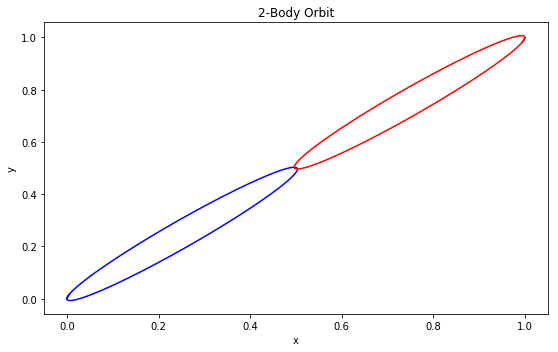

In [7]:
# start the plot
fig = plt.figure(figsize=(15,5))

ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1, y1, 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label=None, 
            title=r'2-Body Orbit', 
            ax=ax_a) 
plot_y_vs_x(x2, y2, 
            axis_labels=x_vs_y_labels, 
            color='red',
            label=None, 
            title=r'2-Body Orbit', 
            ax=ax_a)
fig.tight_layout()

We see that we get a nice orbit with the two masses orbiting each other nicely. 

Now we want to check the limit where one of the masses becomes very heavy. We expect to see the familar conic section orbit that we studied in class. 

In [8]:
#Let's make m1 much larger

m1 = 10000.

# Initial conditions
#position of m1
x1_0 = 0.
y1_0 = 0. 

#initial velocity of m1
x1dot_0 =0. 
y1dot_0 =0. 

#position of m2
x2_0 = 1. 
y2_0 = 0.

#initial velocity of m2
x2dot_0 = 0.
y2dot_0_unbound = -141.
y2dot_0_circular = -100.
y2dot_0_ellipse = -75.

#y2dot_0 = -100 produces a nice bounded orbit for m1=10000., m2 = 1.
#y2dot_0 = -141 produces a nice unbounded orbit for m1=10000., m2 = 1.

x1_unbound, y1_unbound, x1dot_unbound, y1dot_unbound, x2_unbound, y2_unbound, x2dot_unbound, y2dot_unbound = o1.solve_ode(t_pts, x1_0, y1_0, x1dot_0, y1dot_0, x2_0, y2_0, x2dot_0, y2dot_0_unbound)
x1_circular, y1_circular, x1dot_circular, y1dot_circular, x2_circular, y2_circular, x2dot_circular, y2dot_circular = o1.solve_ode(t_pts, x1_0, y1_0, x1dot_0, y1dot_0, x2_0, y2_0, x2dot_0, y2dot_0_circular)
x1_ellipse, y1_ellipse, x1dot_ellipse, y1dot_ellipse, x2_ellipse, y2_ellipse, x2dot_ellipse, y2dot_ellipse = o1.solve_ode(t_pts, x1_0, y1_0, x1dot_0, y1dot_0, x2_0, y2_0, x2dot_0, y2dot_0_ellipse)

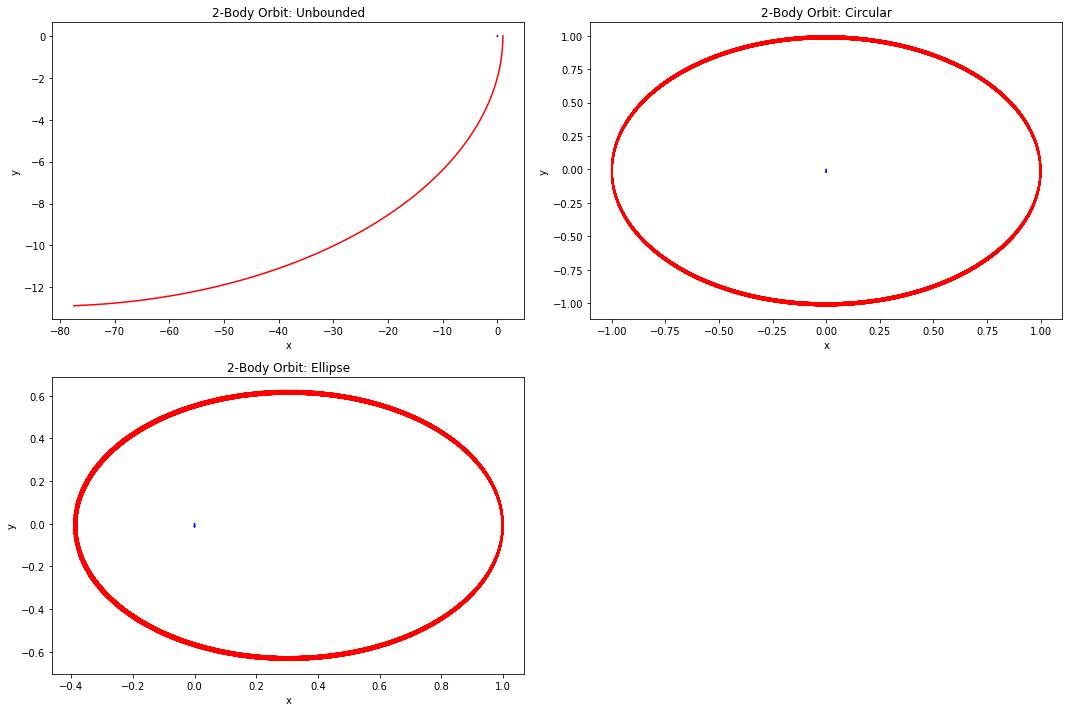

In [9]:
# start the plot!
fig1 = plt.figure(figsize=(15,10))
    
# plot: orbit
ax_a = fig1.add_subplot(2,2,1)                  

#unbounded orbit plot
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1_unbound, y1_unbound, 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label=None, 
            title=r'2-Body Orbit: Unbounded', 
            ax=ax_a) 
plot_y_vs_x(x2_unbound, y2_unbound, 
            axis_labels=x_vs_y_labels, 
            color='red',
            label=None, 
            title=r'2-Body Orbit: Unbounded', 
            ax=ax_a)

#circular orbit plot
ax_b = fig1.add_subplot(2,2,2)                  
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1_circular, y1_circular, 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label=None, 
            title=r'2-Body Orbit: Circular', 
            ax=ax_b) 
plot_y_vs_x(x2_circular, y2_circular, 
            axis_labels=x_vs_y_labels, 
            color='red',
            label=None, 
            title=r'2-Body Orbit: Circular', 
            ax=ax_b)

#elliptical orbit plot
ax_c = fig1.add_subplot(2,2,3)                  
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1_ellipse, y1_ellipse, 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label=None, 
            title=r'2-Body Orbit: Ellipse', 
            ax=ax_c) 
plot_y_vs_x(x2_ellipse, y2_ellipse, 
            axis_labels=x_vs_y_labels, 
            color='red',
            label=None, 
            title=r'2-Body Orbit: Ellipse', 
            ax=ax_c)
fig1.tight_layout()

We can see that we obtain the expected orbits!!